In [3]:
import pandas as pd
import vectorbt as vbt
from tqdm import tqdm
import matplotlib.pyplot as plt
import empyrical as ep
import yfinance as yf

In [5]:
tickers = ["BTC-USD"]
data = yf.download(tickers, period="max", interval="1d", auto_adjust=True, progress=False)
price = data.Close['BTC-USD'].copy()


In [6]:
donchian_upper = price.rolling(7).max().shift()
donchian_mid = price.rolling(7).mean().shift()
sma90 = price.rolling(50).mean().shift()

In [10]:
long_entries = (price > donchian_upper) & (price > sma90)
long_exits = (price < donchian_mid) | (price < sma90)

pf = vbt.Portfolio.from_signals(price, 
                                entries=long_entries,
                                exits=long_exits)

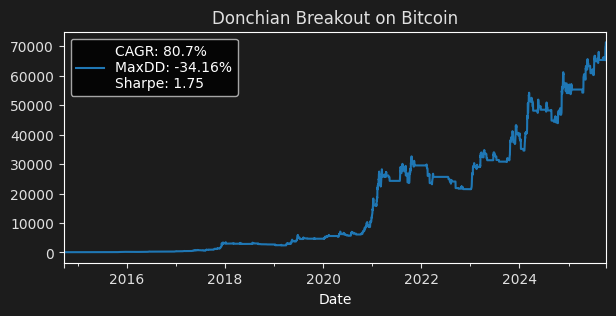

In [11]:
# Plotting results
CLR_BG     = "#1C1C1C"   # dark grey background
CLR_AX     = "#E0E0E0"   # light grey ticks/labels
plt.style.use('dark_background')
pf.value().plot(color='#1f77b4', figsize=(7, 3))
plt.gca().set_facecolor(CLR_BG)
plt.gcf().set_facecolor(CLR_BG)
plt.legend().set_visible(False)
plt.title('Donchian Breakout on Bitcoin', color=CLR_AX)
plt.tick_params(colors=CLR_AX)

# Calculate metrics
sharpe = round(ep.sharpe_ratio(pf.returns(), annualization=365), 2)
cagr = round(ep.cagr(pf.returns(), annualization=365) * 100, 2)
maxdd = round(ep.max_drawdown(pf.returns()) * 100, 2)

# Add metrics to plot legend
plt.legend([f'CAGR: {cagr}%\nMaxDD: {maxdd}%\nSharpe: {sharpe}'])

# Save figure before showing
plt.savefig('./figures/donchian_breakout_on_bitcoin.png', bbox_inches='tight', transparent=False, facecolor=CLR_BG)
plt.show()